In [ ]:
pip install psaw 

In [5]:
from psaw import PushshiftAPI    #library Pushshift
import datetime as dt            #library for date management
#import p                         #library for data manipulation
import matplotlib.pyplot as plt  #library for plotting
import datetime
import pandas as pd
import requests
import json
import csv
import time
import datetime
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [9]:
api = PushshiftAPI()  

In [12]:
time.mktime(datetime.date(2021,1,5).timetuple())

1609801200.0

In [58]:
#"""FOR POSTS"""
def data_prep_posts(subreddit, start_time, end_time, term, filters, limit):
    if(len(filters) == 0):
        filters = ['id', 'author', 'created_utc',
                   'domain', 'url',
                   'title', 'num_comments']                 
 
    posts = list(api.search_submissions(
        q=term,
        subreddit=subreddit,   #Subreddit we want to audit
        after=start_time,      #Start date
        before=end_time,       #End date
        filter=filters,        #Column names we want to retrieve
        limit=limit))          ##Max number of posts

    df_p =  pd.DataFrame(posts) #Return dataframe for analysis
    df_p['datetime'] = df_p['created_utc'].map(lambda t: dt.datetime.fromtimestamp(t))
    df_p = df_p.drop('created_utc', axis=1) 
    df_p = df_p.sort_values(by='datetime')              
    df_p["datetime"] = pd.to_datetime(df_p["datetime"])
    return df_p

In [59]:
#"""FOR COMMENTS"""
def data_prep_comments(subreddit, start_time, end_time, term, filters, limit):
    if (len(filters) == 0):
        filters = ['id', 'author', 'created_utc',
                   'body', 'permalink', 'subreddit', "parent_id", "link_id"]
                   #We set by default some usefull columns 

    comments = list(api.search_comments(
        q=term,                 #Subreddit we want to audit
        subreddit=subreddit,
        after=start_time,       #Start date
        before=end_time,        #End date
        filter=filters,         #Column names we want to retrieve
        limit=limit))           #Max number of comments
    return pd.DataFrame(comments) #Return dataframe for analysis

In [60]:
subreddit = "wallstreetbets"     #Subreddit we are auditing
start_time = int(dt.datetime(2021, 1, 1).timestamp())                                  
end_time = int(dt.datetime(2021, 1, 31).timestamp())   
term = 'gme'
filters = []
limit = 1000


df_p = data_prep_posts(subreddit, term, start_time, end_time,filters,limit) 

df_c = data_prep_comments(subreddit, term, start_time, end_time, filters, limit)

C:\Users\paulr\AppData\Local\Programs\Python\Python310\lib\site-packages\psaw\PushshiftAPI.py:192: UserWarning: Got non 200 code 500
  warnings.warn("Got non 200 code %s" % response.status_code)
C:\Users\paulr\AppData\Local\Programs\Python\Python310\lib\site-packages\psaw\PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")
C:\Users\paulr\AppData\Local\Programs\Python\Python310\lib\site-packages\psaw\PushshiftAPI.py:192: UserWarning: Got non 200 code 502
  warnings.warn("Got non 200 code %s" % response.status_code)


KeyboardInterrupt: 

In [56]:
df_c

,author,body,created_utc,id,link_id,parent_id,permalink,subreddit,created,d_
0,RogueChronico,They can make more whenever they like. There i...,1612047596,glf2urd,t3_l8fzry,t3_l8fzry,/r/cryptostreetbets/comments/l8fzry/doge_has_p...,cryptostreetbets,1.612040e+09,"{'author': 'RogueChronico', 'body': 'They can ..."
1,landj9697,Been trying to buy Dogecoin for 2 days now. W...,1612047581,glf2to5,t3_l87wcr,t3_l87wcr,/r/dogecoin/comments/l87wcr/how_to_buy_dogecoi...,dogecoin,1.612040e+09,"{'author': 'landj9697', 'body': 'Been trying t..."
2,banditcleaner2,???? XLM was 0.105 end of november and is now ...,1612047580,glf2tlh,t3_l8stte,t1_gletqdx,/r/AltStreetBets/comments/l8stte/bags_of_an_al...,AltStreetBets,1.612040e+09,"{'author': 'banditcleaner2', 'body': '???? XLM..."
3,Explodicle,Bitcoin once had _literally_ perfect inequalit...,1612047567,glf2slt,t3_l8pwes,t1_gle5dnd,/r/cryptoleftists/comments/l8pwes/yanis_varouf...,cryptoleftists,1.612040e+09,"{'author': 'Explodicle', 'body': 'Bitcoin once..."
4,SmashChip,"Just bitcoin it dude, it's like a sonar, all t...",1612047564,glf2sem,t3_l8y1f2,t3_l8y1f2,/r/teenagers/comments/l8y1f2/bruh_i_suck_at_in...,teenagers,1.612040e+09,"{'author': 'SmashChip', 'body': 'Just bitcoin ..."
...,...,...,...,...,...,...,...,...,...,...
560,Current_Canary_3818,Just sounds like you’re hating. A lot of folk...,1612042295,gles16u,t3_l8un61,t1_gleqdwu,/r/WallStreetbetsELITE/comments/l8un61/help_wh...,WallStreetbetsELITE,1.612035e+09,"{'author': 'Current_Canary_3818', 'body': 'Jus..."
561,We_Are_Legion_S,Ethereums FUTURE IS 1 CENT. DOGE TO $1 🚀🚀🚀. BI...,1612042285,gles0fs,t3_l8vzo4,t1_gleri47,/r/dogecoin/comments/l8vzo4/share_this/gles0fs/,dogecoin,1.612035e+09,"{'author': 'We_Are_Legion_S', 'body': 'Ethereu..."
562,SamWright85,Gemini is owned by the Winklevoss bros. The OG...,1612042280,gles04s,t3_l8tj19,t1_glejvzy,/r/litecoin/comments/l8tj19/i_think_litecoin_i...,litecoin,1.612035e+09,"{'author': 'SamWright85', 'body': 'Gemini is o..."
563,vmalarcon,You don't have that bitcoin and that ethereum....,1612042278,glerzy6,t3_l8utno,t3_l8utno,/r/Bitcoin/comments/l8utno/bitcoin_on_robinhoo...,Bitcoin,1.612035e+09,"{'author': 'vmalarcon', 'body': 'You don't hav..."


In [55]:
df_p.merge(df_c, left_on="id", right_on="parent_id")

,author_x,domain,id_x,num_comments,title,url,created_x,d__x,datetime,author_y,body,created_utc,id_y,link_id,parent_id,permalink,subreddit,created_y,d__y


In [ ]:
##### getting data only by term

In [11]:
#"""FOR POSTS"""
def get_posts_by_term(start_time, end_time, term, filters):
    if(len(filters) == 0):
        filters = ['id', 'author', 'created_utc',
                   'domain', 'url',
                   'title', 'num_comments']                 
 
    posts = list(api.search_submissions(
        q=term,
        after=start_time,      #Start date
        before=end_time,       #End date
        filter=filters) )      #Column names we want to retrieve
        
    print(posts)
    df_p =  pd.DataFrame(posts) #Return dataframe for analysis
    df_p['datetime'] = df_p['created_utc'].map(lambda t: dt.datetime.fromtimestamp(t))
    df_p = df_p.drop('created_utc', axis=1) 
    df_p = df_p.sort_values(by='datetime')              
    df_p["datetime"] = pd.to_datetime(df_p["datetime"])
    return df_p

In [12]:
start_time = int(dt.datetime(2021, 1, 1).timestamp())                                  
end_time = int(dt.datetime(2021, 1, 5).timestamp())   
term = 'robinhood'
filters = []


df_p = get_posts_by_term(term, start_time, end_time,filters) 

KeyboardInterrupt: 

In [41]:
def count_posts_per_date(df_p, title, xlabel, ylabel):
    
    df_p.groupby([df_p.datetime.dt.date]).count().plot(y='id', rot=45, kind='bar', label='Posts', figsize=(16,4))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.show()

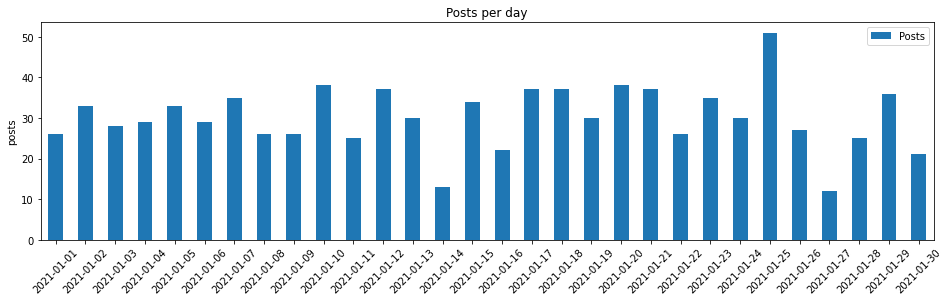

In [42]:
count_posts_per_date(df_p, "Posts per day", "", "posts" )

In [46]:
def mean_comments_per_date(df_p, title, xlabel, ylabel):
    
    df_p.groupby([df_p.datetime.dt.date]).mean().plot(y='num_comments', rot=45, kind='line', label='Comments', figsize=(16,4))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

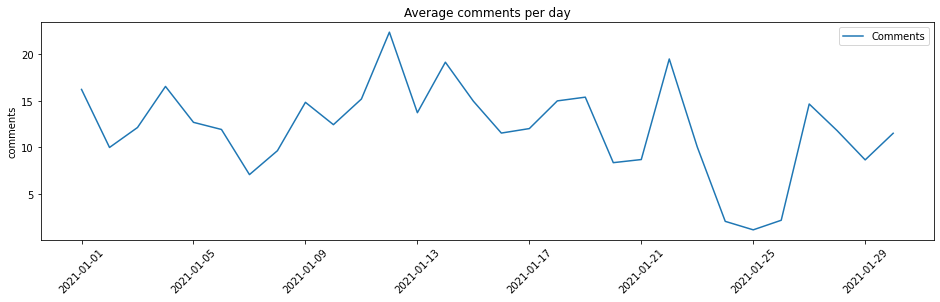

In [48]:
mean_comments_per_date(df_p, "Average comments per day", "", "comments")

In [49]:
df_c

,author,body,created_utc,id,permalink,subreddit,created,d_
0,RogueChronico,They can make more whenever they like. There i...,1612047596,glf2urd,/r/cryptostreetbets/comments/l8fzry/doge_has_p...,cryptostreetbets,1.612040e+09,"{'author': 'RogueChronico', 'body': 'They can ..."
1,landj9697,Been trying to buy Dogecoin for 2 days now. W...,1612047581,glf2to5,/r/dogecoin/comments/l87wcr/how_to_buy_dogecoi...,dogecoin,1.612040e+09,"{'author': 'landj9697', 'body': 'Been trying t..."
2,banditcleaner2,???? XLM was 0.105 end of november and is now ...,1612047580,glf2tlh,/r/AltStreetBets/comments/l8stte/bags_of_an_al...,AltStreetBets,1.612040e+09,"{'author': 'banditcleaner2', 'body': '???? XLM..."
3,Explodicle,Bitcoin once had _literally_ perfect inequalit...,1612047567,glf2slt,/r/cryptoleftists/comments/l8pwes/yanis_varouf...,cryptoleftists,1.612040e+09,"{'author': 'Explodicle', 'body': 'Bitcoin once..."
4,SmashChip,"Just bitcoin it dude, it's like a sonar, all t...",1612047564,glf2sem,/r/teenagers/comments/l8y1f2/bruh_i_suck_at_in...,teenagers,1.612040e+09,"{'author': 'SmashChip', 'body': 'Just bitcoin ..."
...,...,...,...,...,...,...,...,...
560,Current_Canary_3818,Just sounds like you’re hating. A lot of folk...,1612042295,gles16u,/r/WallStreetbetsELITE/comments/l8un61/help_wh...,WallStreetbetsELITE,1.612035e+09,"{'author': 'Current_Canary_3818', 'body': 'Jus..."
561,We_Are_Legion_S,Ethereums FUTURE IS 1 CENT. DOGE TO $1 🚀🚀🚀. BI...,1612042285,gles0fs,/r/dogecoin/comments/l8vzo4/share_this/gles0fs/,dogecoin,1.612035e+09,"{'author': 'We_Are_Legion_S', 'body': 'Ethereu..."
562,SamWright85,Gemini is owned by the Winklevoss bros. The OG...,1612042280,gles04s,/r/litecoin/comments/l8tj19/i_think_litecoin_i...,litecoin,1.612035e+09,"{'author': 'SamWright85', 'body': 'Gemini is o..."
563,vmalarcon,You don't have that bitcoin and that ethereum....,1612042278,glerzy6,/r/Bitcoin/comments/l8utno/bitcoin_on_robinhoo...,Bitcoin,1.612035e+09,"{'author': 'vmalarcon', 'body': 'You don't hav..."
